<b> Data encoding </b>  is the process of converting categorical data (non-numerical data) into numerical formats so that machine learning algorithms, which work with numerical data, can process them effectively.

## One hot encoding

* One-hot encoding converts each unique category of a categorical feature into a new binary column. Each column represents one category, and a 1 is placed in the column corresponding to the category's value for a given row, with all other columns set to 0.



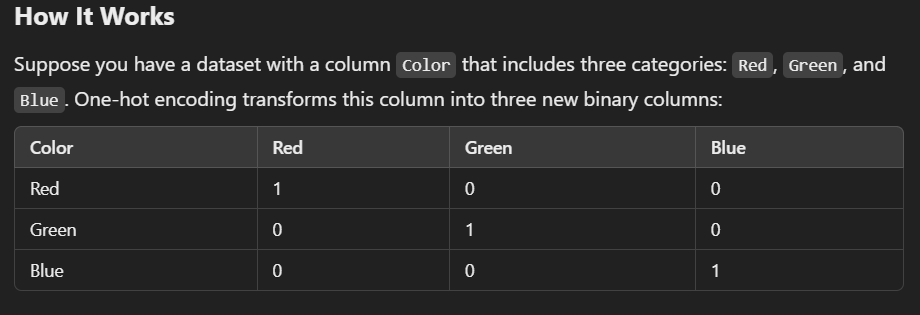

 <b> When to use one hot encoding? </b>

* Low Cardinality: It works well when the categorical feature has a small number of unique values.

* No Natural Order: If categories don't have a specific order (like Red, Green, Blue), one-hot encoding prevents the algorithm from assuming any ordinal relationship.

In [2]:
import pandas as pd

# Example dataset
data = {'Color': ['Red', 'Green', 'Blue', 'Red', 'Green']}
df = pd.DataFrame(data)

# One-hot encoding
encoded_df = pd.get_dummies(df, columns=['Color'])

df

,Color
0,Red
1,Green
2,Blue
3,Red
4,Green


In [3]:
encoded_df

,Color_Blue,Color_Green,Color_Red
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0


<b> Advantages </b>

* Interpretability: The binary format is easy to understand.

* No Bias: Avoids assigning ordinal relationships to categories where none exist.


<b> Challenges </b>

* Curse of Dimensionality: With high-cardinality features (e.g., 1,000 unique categories), one-hot encoding creates a large number of columns, which can be computationally expensive.
* Sparsity: The resulting matrix is often sparse (many zero values), which can slow down training and increase storage needs. This leads to overfitting. 

In [8]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

data = {'color': ['Red', 'Green', 'Blue', 'Red', 'Blue']}

df = pd.DataFrame(data)

df.head()

,color
0,Red
1,Green
2,Blue
3,Red
4,Blue


In [9]:
## creating an instance
encoder = OneHotEncoder()

In [11]:
encoded = encoder.fit_transform(df[['color']]).toarray()

In [12]:
import pandas as pd

In [13]:
encoded_df = pd.DataFrame(encoded, columns = encoder.get_feature_names_out())

In [14]:
encoded_df

,color_Blue,color_Green,color_Red
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
# for new data
encoder.transform([['Blue']]).toarray()

array([[1., 0., 0.]])

In [18]:
final_df = pd.concat([df, encoded_df], axis =1)

In [19]:
final_df

,color,color_Blue,color_Green,color_Red
0,Red,0.0,0.0,1.0
1,Green,0.0,1.0,0.0
2,Blue,1.0,0.0,0.0
3,Red,0.0,0.0,1.0
4,Blue,1.0,0.0,0.0


### Summary

* Use pandas.get_dummies for quick prototyping, data exploration, or if you're working purely within pandas.

* Use OneHotEncoder when integrating into a machine learning pipeline, especially if you need:
Sparse matrix support.
Handling unseen categories.
Feature name retrieval and compatibility with scikit-learn estimators.

## Label Encoding/Ordinal encoding

Label encoding is a technique used to convert categorical data into numerical labels. This encoding assigns a unique integer to each category within a feature, making the data interpretable by machine learning algorithms that require numerical input.



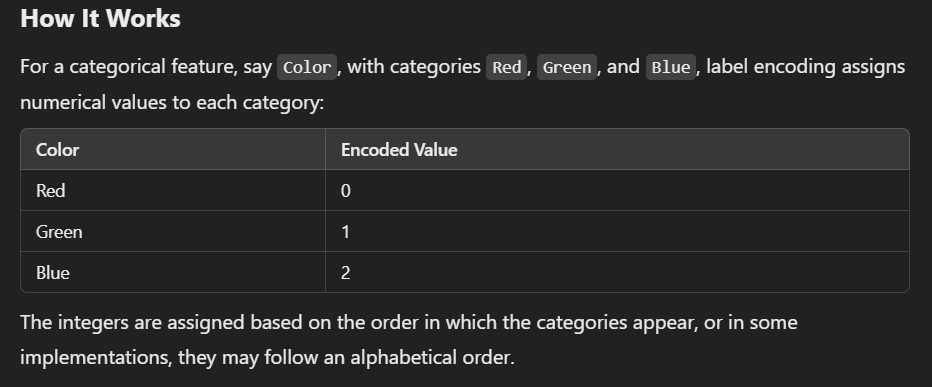

<b> When to use Label Encoding? </b>

Use label encoding when:

* The categories have an ordinal relationship (e.g., Low, Medium, High).

* You’re working with tree-based models (e.g., Random Forest, Decision Trees) since they handle encoded labels effectively and do not assume any ordinal relationships between categories.
* Avoid label encoding for non-ordinal categorical features in models like linear regression or logistic regression because the encoded integers may introduce unintended ordinal bias.



In [25]:
from sklearn.preprocessing import LabelEncoder

# Example data
data = {'Color': ['Red', 'Green', 'Blue', 'Red', 'Green']}
df = pd.DataFrame(data)

# Initialize the encoder
label_encoder = LabelEncoder()

# Fit and transform the data
df['Color_Encoded'] = label_encoder.fit_transform(df['Color'])

df
# NUMBERED BASED ON ALPHABETICAL ORDER

,Color,Color_Encoded
0,Red,2
1,Green,1
2,Blue,0
3,Red,2
4,Green,1


In [26]:
print("Class Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Class Mapping: {'Blue': 0, 'Green': 1, 'Red': 2}


<b> Advantages </b>

* Simple and Fast: Easy to implement and efficient for ordinal data.

* Memory Efficient: Requires less memory compared to one-hot encoding since it doesn't add extra columns.

<b> Challenges </b>

* Ordinal Bias: For non-ordinal data, models like linear regression may interpret encoded integers as ordered values, introducing bias.

* Ambiguity in Classes: If the encoded integers are not tied to ordinal relationships, they may confuse models that assume numerical data has meaningful relationships.

<b> Use cases </b>

* Ordinal Data: Features like Experience Level (Beginner, Intermediate, Advanced) can be encoded numerically.

* Tree-Based Models: Decision Trees or Random Forests can use label-encoded features effectively, as they split based on feature values without assuming order.

In [28]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Example data
data = {'Education': ['High School', 'Undergraduate', 'Postgraduate', 'High School']}
df = pd.DataFrame(data)

# Define the order of categories
categories = [['High School', 'Undergraduate', 'Postgraduate']]

# Initialize the encoder
ordinal_encoder = OrdinalEncoder(categories=categories)

# Fit and transform the data
df['Education_Encoded'] = ordinal_encoder.fit_transform(df[['Education']])

df


,Education,Education_Encoded
0,High School,0.0
1,Undergraduate,1.0
2,Postgraduate,2.0
3,High School,0.0


## Target guided Encoding

Target Guided Encoding is a type of categorical encoding where the mapping of categories to numerical values is guided by the relationship between the categories and the target variable. This encoding approach creates a numerical representation based on the statistical properties of the target for each category, such as the mean or probability of the target value for a given category.



In [29]:
import pandas as pd

# Example data
data = {'City': ['Bengaluru', 'Chennai', 'Bengaluru', 'Mumbai', 'Chennai'], 'Purchased': [1, 0, 0, 1, 1]}
df = pd.DataFrame(data)

# Calculate mean target value for each category
mean_target = df.groupby('City')['Purchased'].mean()

# Map the mean to each category
df['City_Encoded'] = df['City'].map(mean_target)

df


,City,Purchased,City_Encoded
0,Bengaluru,1,0.5
1,Chennai,0,0.5
2,Bengaluru,0,0.5
3,Mumbai,1,1.0
4,Chennai,1,0.5


<b> Advantages </b>

* Captures Relationship with Target: Categories are encoded based on their predictive power for the target variable.

* Memory Efficient: Unlike one-hot encoding, it doesn’t increase the number of features, making it ideal for high-cardinality features.

<b> Challenges </b>

* Overfitting: Mean encoding can lead to overfitting if the dataset is small because it directly uses information from the target variable.

Solution: Use techniques like smoothing (blending category mean with global mean) or K-fold encoding (split the data and encode using out-of-fold means).

* Target Leakage: If the target values influence encoding before model training, it can result in data leakage.

Solution: Ensure encoding is applied to the training set independently of the test set.

<b> Use cases </b>

* High-Cardinality Categorical Features: Features like City, Product ID, or Zip Code that have too many categories for one-hot encoding.

* Feature Engineering: Enhances model performance by leveraging the predictive power of categorical features.